# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather['coord']['lat']
        city_long = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country= city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_latitude,
                          "Lng": city_long,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | concepcion
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | lincoln park
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | boende
Processing Record 13 of Set 1 | dakhla
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | cascais
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | wawa
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,concepcion,-36.8270,-73.0498,283.04,81,0,4.63,CL,1720733085
1,georgetown,5.4112,100.3354,299.12,77,40,2.57,MY,1720733086
2,adamstown,-25.0660,-130.1015,295.19,89,99,13.55,PN,1720732949
3,kodiak,57.7900,-152.4072,284.88,94,100,4.12,US,1720733089
4,mar del plata,-38.0023,-57.5575,282.16,84,0,3.13,AR,1720733091


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,concepcion,-36.8270,-73.0498,283.04,81,0,4.63,CL,1720733085
1,georgetown,5.4112,100.3354,299.12,77,40,2.57,MY,1720733086
2,adamstown,-25.0660,-130.1015,295.19,89,99,13.55,PN,1720732949
3,kodiak,57.7900,-152.4072,284.88,94,100,4.12,US,1720733089
4,mar del plata,-38.0023,-57.5575,282.16,84,0,3.13,AR,1720733091


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

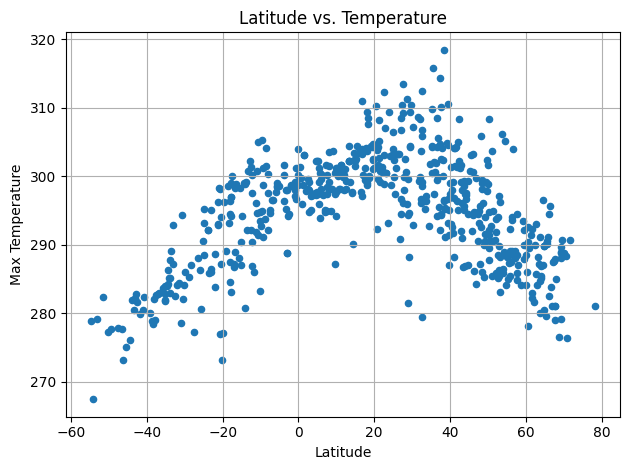

In [22]:
# Build scatter plot for latitude vs. temperature
scatter_lat=city_data_df.plot(kind='scatter',x='Lat',y='Max Temp',title='Latitude vs Temperature')


# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

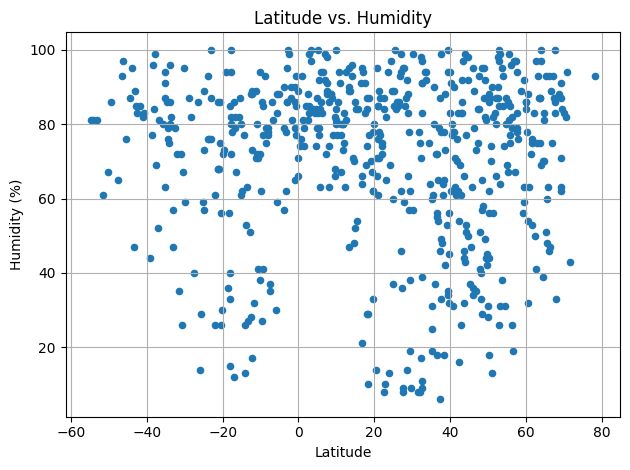

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
scatter_humidity=city_data_df.plot(kind='scatter',x='Lat',y='Humidity',title='Latitude vs Humidity')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

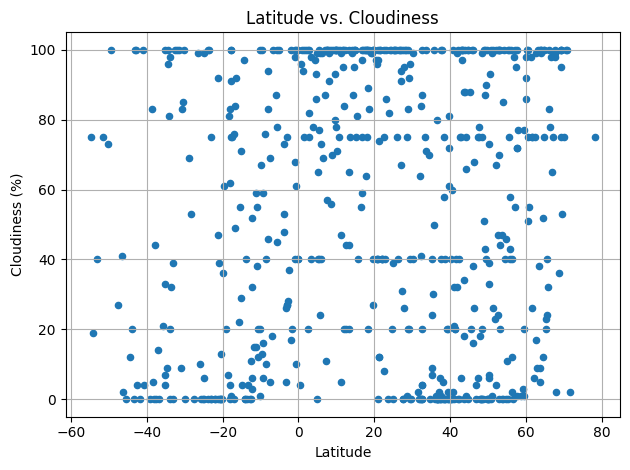

In [24]:
# Build the scatter plots for latitude vs. cloudiness
scatter_cloudiness=city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',title='Latitude vs Cloudiness')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

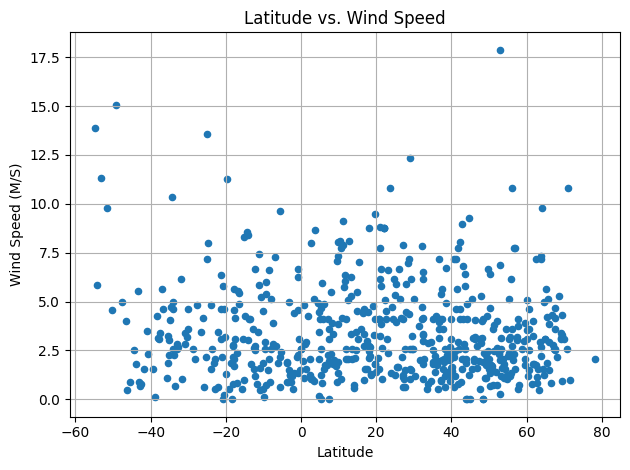

In [25]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
wind_speed=city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed',title='Latitude vs Wind Speed Plot')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (M/S)')
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linefunction(df, x_column, y_column):
    result= linregress(df[x_column], df[y_column])
    
    # Regression parameters
    print(f"slope={result.slope},intercept= {result.intercept},rvalue= {result.rvalue}, pvalue={result.pvalue},stderr= {result.stderr}")

linefunction(city_data_df,'Lat','Lng')

slope=-0.05894006824627906,intercept= 20.530338941212506,rvalue= -0.021060999728638674, pvalue=0.6093678890857591,stderr= 0.1152862901407855


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,georgetown,5.4112,100.3354,299.12,77,40,2.57,MY,1720733086
3,kodiak,57.7900,-152.4072,284.88,94,100,4.12,US,1720733089
6,kingston,17.9970,-76.7936,303.68,74,75,8.75,JM,1720733094
7,lincoln park,42.2506,-83.1785,302.21,54,40,4.12,US,1720733095
12,dakhla,23.6848,-15.9580,293.16,94,0,10.80,EH,1720733103


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_df=city_data_df.loc[city_data_df['Lat']<=0]
# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,concepcion,-36.8270,-73.0498,283.04,81,0,4.63,CL,1720733085
2,adamstown,-25.0660,-130.1015,295.19,89,99,13.55,PN,1720732949
4,mar del plata,-38.0023,-57.5575,282.16,84,0,3.13,AR,1720733091
5,port mathurin,-19.6833,63.4167,296.22,73,61,11.25,MU,1720733092
8,puerto ayora,-0.7393,-90.3518,299.13,93,61,1.34,EC,1720733097


###  Temperature vs. Latitude Linear Regression Plot

In [29]:
# Linear regression on Northern Hemisphere
north_regression=linefunction(northern_df,'Max Temp','Lat')

slope=-1.550391861791376,intercept= 496.0184507768013,rvalue= -0.5994720316527804, pvalue=1.579308079068297e-42,stderr= 0.10100727575170848


In [30]:
# Linear regression on Southern Hemisphere
south_regression=linefunction(southern_df,'Max Temp', 'Lat')

slope=1.3987195117475841,intercept= -426.8709847885171,rvalue= 0.7974781321314858, pvalue=1.7441009518201641e-38,stderr= 0.08188821124342174


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [31]:
When analyzing something like Latitude vs. Temperature in Northern Hemisphere, these results might suggest that as latitude 
increases or it moves away from the equator, the temperature decreases, and this relationship is statistically significant.There is a
strong negative relationship here, based on slope, p-value, and r-value. 
For the Southern Hemisphere, we see that Latitude increases, Temperate also increases, because this means we are moving north towards
the equator. The R-value shows a very strong positive relationship, as x increases so does y. 

We can reject the null hypothesis here, since there is a clear positive correlation. 


SyntaxError: invalid syntax (3399913909.py, line 1)

### Humidity vs. Latitude Linear Regression Plot

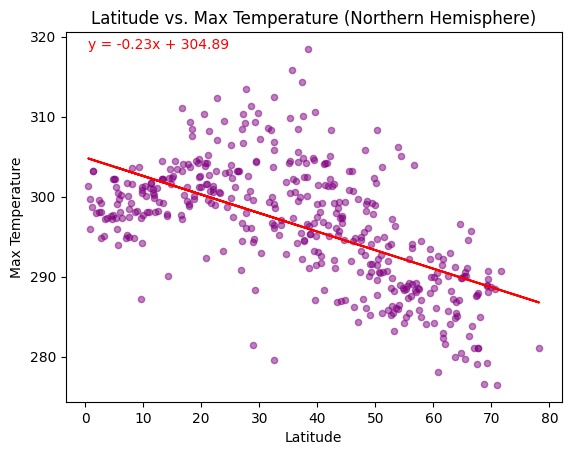

The r-value is: -0.5994720316527804


In [32]:
# Northern Hemisphere
rvalue = northern_df['Lat'].corr(northern_df['Max Temp'])
northern_df.plot.scatter(x='Lat', y='Max Temp', color='purple', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Max Temp'])

plt.title('Latitude vs. Max Temperature (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_df['Lat'].min(), northern_df['Max Temp'].max(), equation, color='red')

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', label='Regression Line')
plt.show()
print(f"The r-value is: {r_value}")

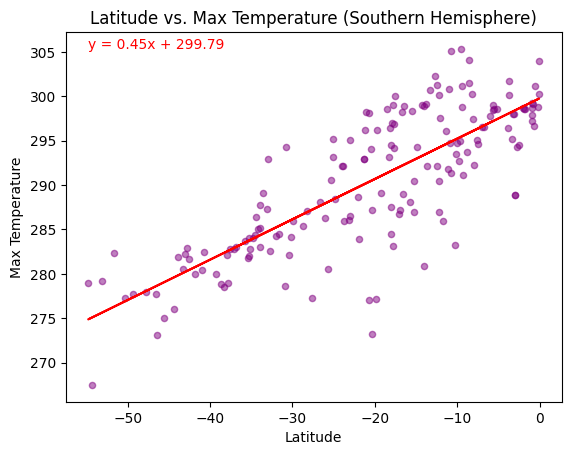

The r-value is: 0.7974781321314858


In [33]:
# Southern Hemisphere
#rvalue = southern_df['Lat'].corr(northern_df['Max Temp'])
southern_df.plot.scatter(x='Lat', y='Max Temp', color='purple', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Max Temp'])

plt.title('Latitude vs. Max Temperature (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_df['Lat'].min(), southern_df['Max Temp'].max(), equation, color='red')

plt.plot(southern_df['Lat'], slope * southern_df['Lat'] + intercept, color='red', label='Regression Line')
plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
We can visualy see the correlation between the two variables as discussed above. For north a line point down, showing the 
strong negative relationship. For South, our line pointing up, showing the strong positive relationship. The r-values both 
proving our hypothesis: .79, strong positive, and -.59 strong negative. 

### Cloudiness vs. Latitude Linear Regression Plot

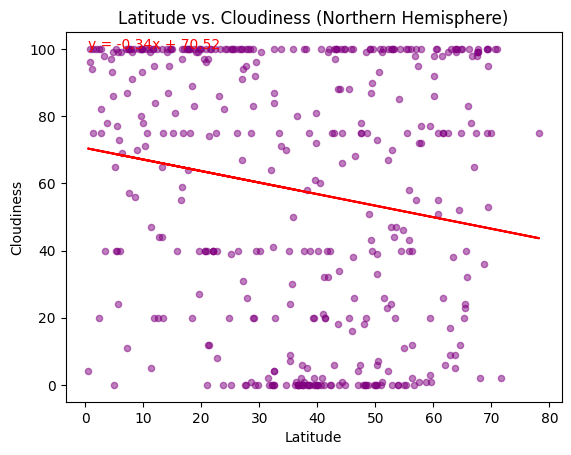

The r-value is: -0.17080880313127159


In [34]:
# Northern Hemisphere
northern_df.plot.scatter(x='Lat', y='Cloudiness', color='purple', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Cloudiness'])

plt.title('Latitude vs. Cloudiness (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_df['Lat'].min(), northern_df['Cloudiness'].max(), equation, color='red')

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', label='Regression Line')
plt.show()
print(f"The r-value is: {r_value}")

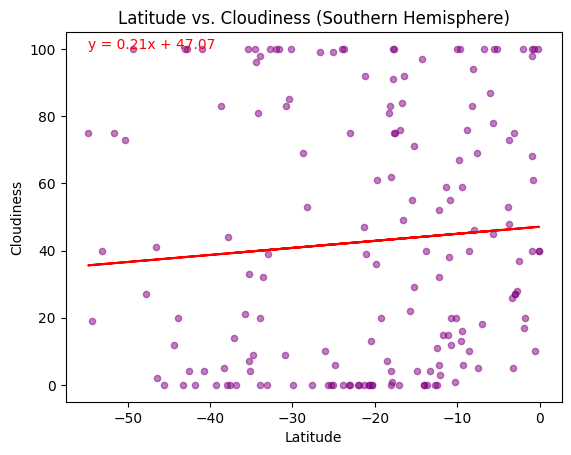

The r-value is: 0.07809471863654807


In [35]:
# Southern Hemisphere
southern_df.plot.scatter(x='Lat', y='Cloudiness', color='purple', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Cloudiness'])

plt.title('Latitude vs. Cloudiness (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_df['Lat'].min(), southern_df['Cloudiness'].max(), equation, color='red')

plt.plot(southern_df['Lat'], slope * southern_df['Lat'] + intercept, color='red', label='Regression Line')
plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The R-value of 0.078 for South suggests a very weak positive linear relationship between cloudiness and latitude for South. 
For North the R-value shows a very weak negative relationship.This means that as latitude increases, cloudiness slightly 
increases, but the relationship is very weak.
While there might be a slight tendency for cloudiness to decrease as latitude increases (or vice versa), 
this relationship is not strong for both South and North. 

### Wind Speed vs. Latitude Linear Regression Plot

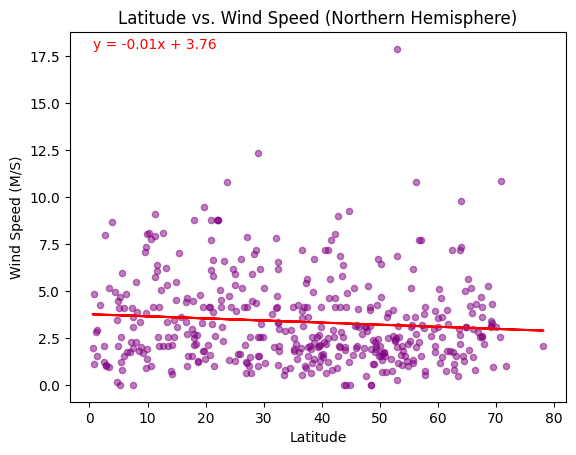

The r-value is: -0.09241756756035727


In [36]:
# Northern Hemisphere
northern_df.plot.scatter(x='Lat', y='Wind Speed', color='purple', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(northern_df['Lat'], northern_df['Wind Speed'])

plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (M/S)')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_df['Lat'].min(), northern_df['Wind Speed'].max(), equation, color='red')

plt.plot(northern_df['Lat'], slope * northern_df['Lat'] + intercept, color='red', label='Regression Line')
plt.show()
print(f"The r-value is: {r_value}")

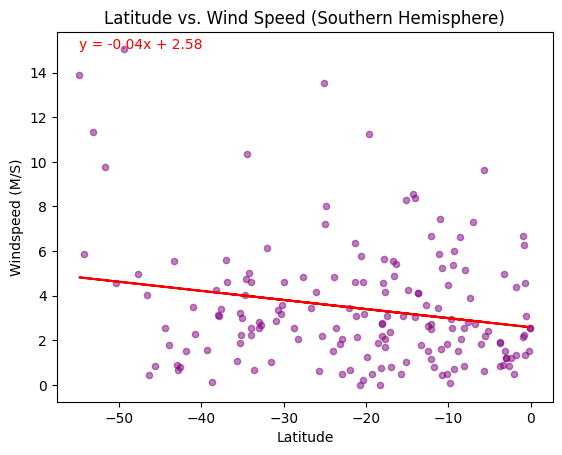

The r-value is: -0.21021756549904974


In [37]:
# Southern Hemisphere
southern_df.plot.scatter(x='Lat', y='Wind Speed', color='purple', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(southern_df['Lat'], southern_df['Wind Speed'])

plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (M/S)')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_df['Lat'].min(), southern_df['Wind Speed'].max(), equation, color='red')

plt.plot(southern_df['Lat'], slope * southern_df['Lat'] + intercept, color='red', label='Regression Line')
plt.show()
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [38]:
An R-value indicates a weak negative linear relationship between the two variables. For North this indicates that as one variable increases, 
the other variable tends to decrease slightly, but the relationship is very weak. For South, The r-value is: -0.21 indicates another
weak negative linear relationship, as one variable increases the other tends to decrease but not a way that is statistically relevant. 
Accross the board North and South do not differ much in their relationship between Latitude and Windspeed. 

SyntaxError: invalid syntax (611980265.py, line 1)